In [4]:
import pandas as pd
df = pd.read_csv('/content/advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df = df.rename(columns={'TV':'tv','Radio':'radio', 'Newspaper':'newspaper', 'Sales':'sales' })
df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghitung nilai inersia untuk jumlah cluster
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertias.append(km.inertia_)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Method untuk Menentukan Jumlah Cluster Optimal')

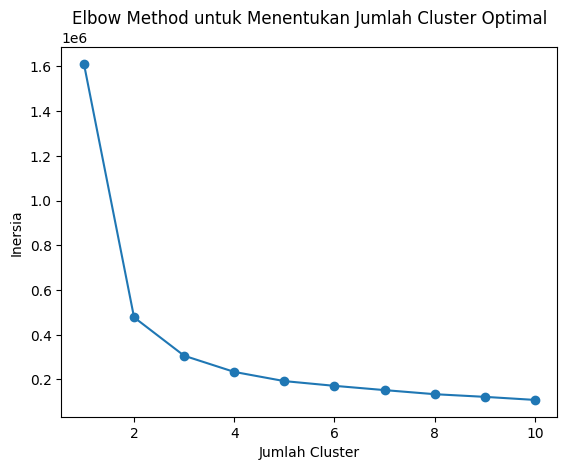

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Plot nilai inersia

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


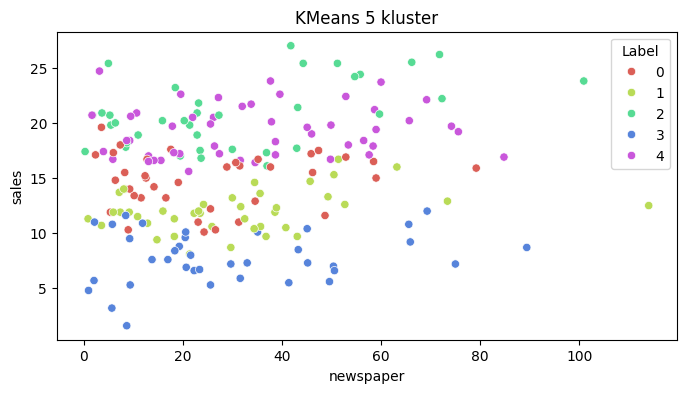

In [14]:
# Memilih jumlah klaster terbaik
# Misalnya, untuk 5 klaster
best_k = 5
km = KMeans(n_clusters=best_k)
km.fit(df)

# Tambahkan kolom label ke dataframe df
df['Label'] = km.labels_

# Buat plot kmeans dengan klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['newspaper'], y=df['sales'], hue=df['Label'], palette=sns.color_palette('hls', best_k))
plt.title('KMeans 5 kluster')
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()